#**XOR with Multi-layer Perceptron**

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [4]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

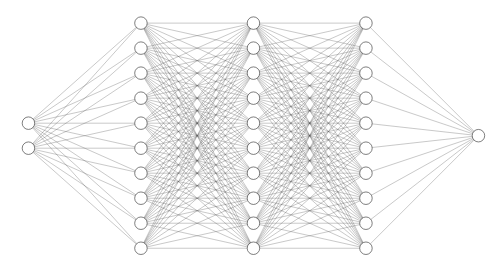

In [5]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [6]:
for epoch in range(10001):
  optimizer.zero_grad()
  # forward 연산
  hypothesis = model(X)

  # cost function
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

# 각 epoch 마다 역전파가 수행됨

0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931513547897339
400 0.6931492686271667
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931415796279907
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931172013282776
2100 0.6931144595146179
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930611729621887
3300 0.6930519342422485
3400 0.693041205406189
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.692910373210907
4100 0.6928650140762329
4200 0.

In [7]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1169014e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8533139e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
